# Importing the Packages and the required functions

In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import autocorrelation_plot
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial import ConvexHull

warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")

# Reading in the data from the datasets

In [51]:
ev_sales=pd.read_excel("Ev Sales.xlsx")
ev_sales.head()

,YEAR,2 W,3 W,4 W,BUS,TOTAL
0,2017-04-01,96,4748,198,0,5042
1,2017-05-01,91,6720,215,2,7028
2,2017-06-01,137,7178,149,1,7465
3,2017-07-01,116,8775,120,0,9011
4,2017-08-01,99,8905,137,0,9141


In [52]:
purchase_behaviour=pd.read_csv("Indian automoble buying behavour study 1.0.csv")
purchase_behaviour.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [53]:
purchase_behaviour.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
       'Total Salary', 'Make', 'Price'],
      dtype='object')

In [54]:
review_2w=pd.read_csv("2-wheeler-EV-bikewale.csv")
review_2w.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube


In [55]:
review_2w.isna().sum(),len(review_2w)

(review                 47
 Used it for             0
 Owned for               0
 Ridden for            176
 rating                  0
 Visual Appeal         105
 Reliability           128
 Performance           499
 Service Experience    141
 Extra Features        659
 Comfort               314
 Maintenance cost      664
 Value for Money       454
 Model Name              0
 dtype: int64,
 844)

In [56]:
review_4w1=pd.read_csv("4-wheeler-EV-cardekho.csv")
review_4w2=pd.read_csv("4-wheeler-EV-carwale.csv")
review_4w=pd.concat([review_4w1,review_4w1])
review_4w.head()

,Review,Rating,Attributes Mentioned,Model
0,Using it for the last 1 month. It's a gentle-l...,5.0,['mileage' 'performance' 'power' 'price' 'seat...,hyundai kona
1,"In the beginning, the car performed excellentl...",1.0,['mileage' 'performance' 'service' 'parts'],hyundai kona
2,Hyundai is the best performing company beating...,5.0,['performance' 'service'],hyundai kona
3,The car offers reasonable performance in this ...,5.0,['performance'],hyundai kona
4,Hyundai Kona - First electric car of India was...,4.0,['looks' 'comfort' 'interior' 'price' 'insuran...,hyundai kona


In [57]:
ev_sales.isna().sum()

YEAR     0
2 W      0
3 W      0
4 W      0
BUS      0
TOTAL    0
dtype: int64

## EDA and Future Prediction using ARIMA model on ev_sales dataset

<Axes: xlabel='YEAR', ylabel='value'>

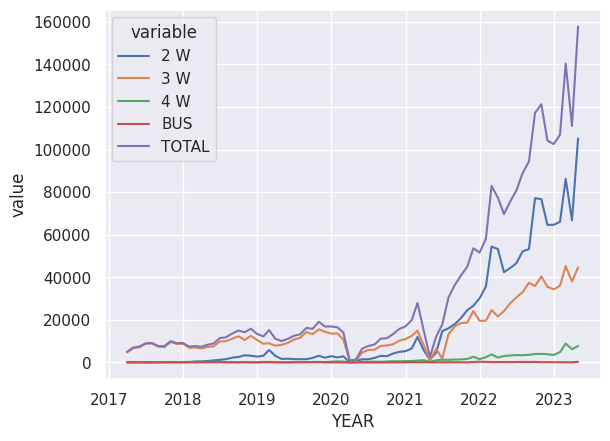

In [58]:
ev_sales_melt=pd.melt(ev_sales,['YEAR',])
sns.lineplot(ev_sales_melt,x='YEAR',y='value',hue='variable')

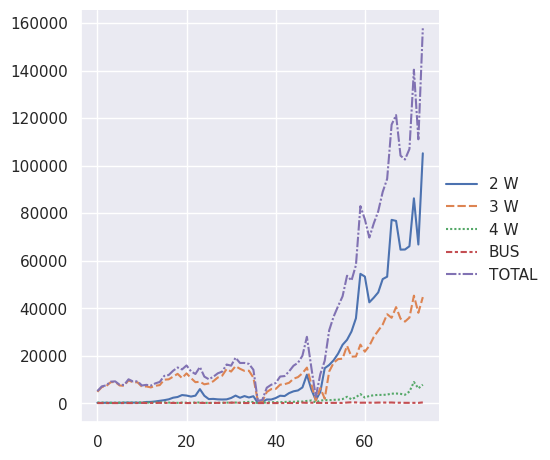

In [59]:
sns.relplot(ev_sales,kind='line')

In [60]:
adf_test = adfuller(ev_sales['2 W'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: 0.430034
p-value: 0.982584


as the p value is > 0.05 the time series is non stationary and has a unit root 


In [61]:
def arima_model_pred(col,p=10,q=2,r=0,xlab='Month',ylab='Sale Quantity'):
    autocorrelation_plot(col)
    plt.show()
    model = ARIMA(col, order=(p,2,0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=12)
    forecast
    plt.plot(col, label='Training Data')
    plt.plot(forecast, label='Forecasted Data')
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title('ARIMA Model Forecast')
    plt.legend()
    plt.show()

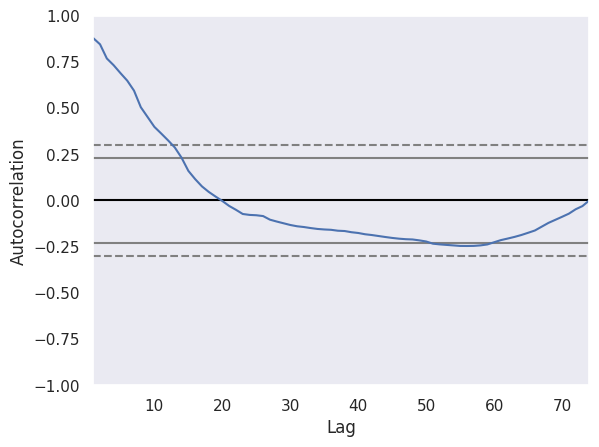

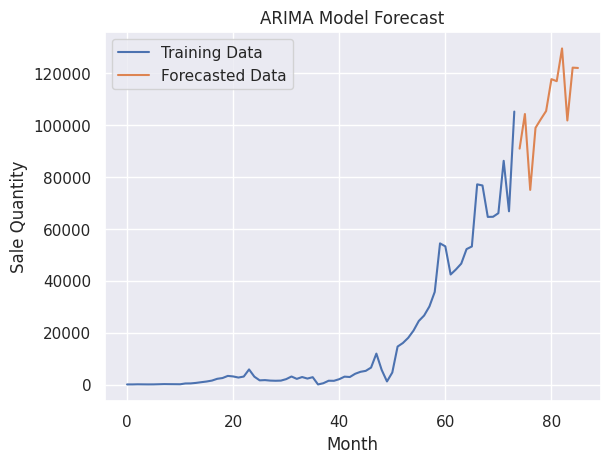

In [62]:
arima_model_pred(ev_sales['2 W'])

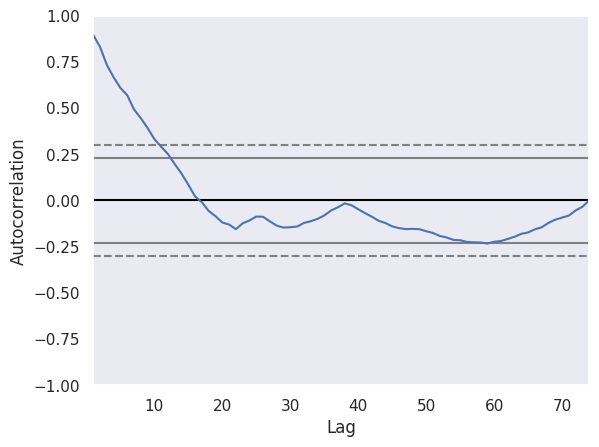

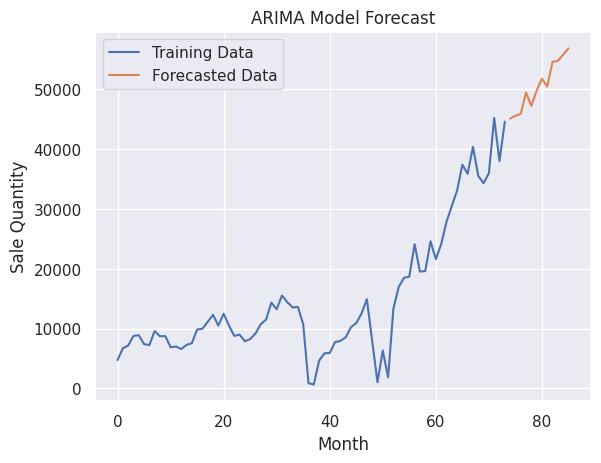

In [63]:
arima_model_pred(ev_sales['3 W'])

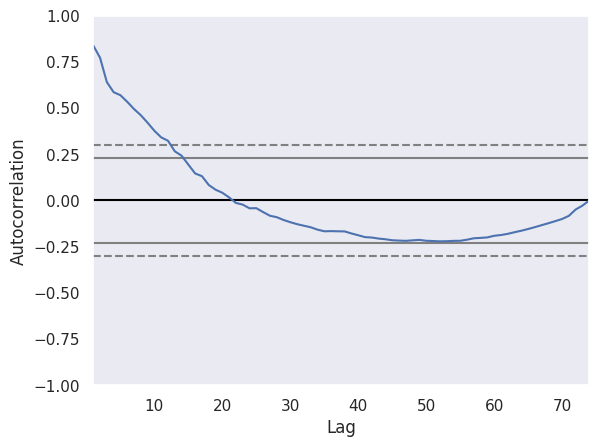

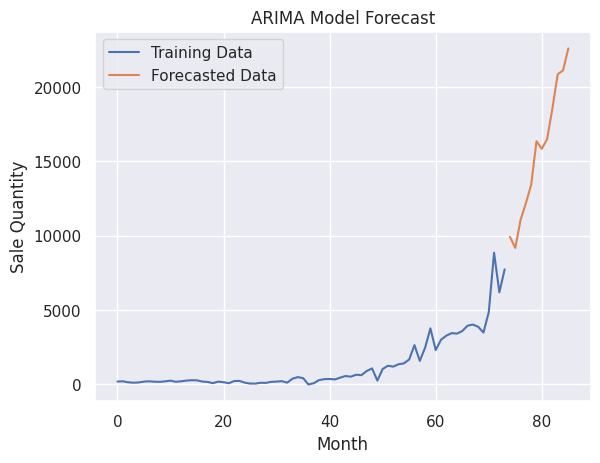

In [64]:
arima_model_pred(ev_sales['4 W'])

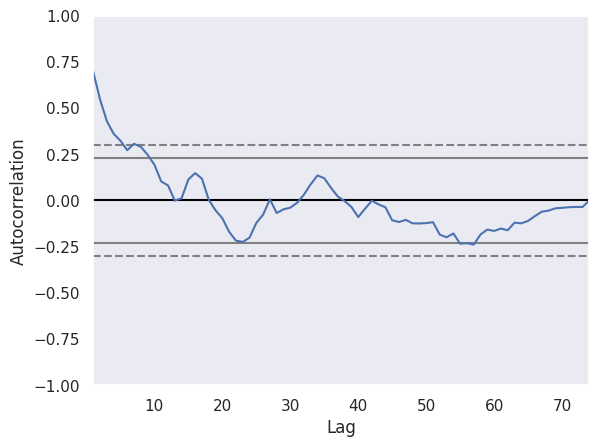

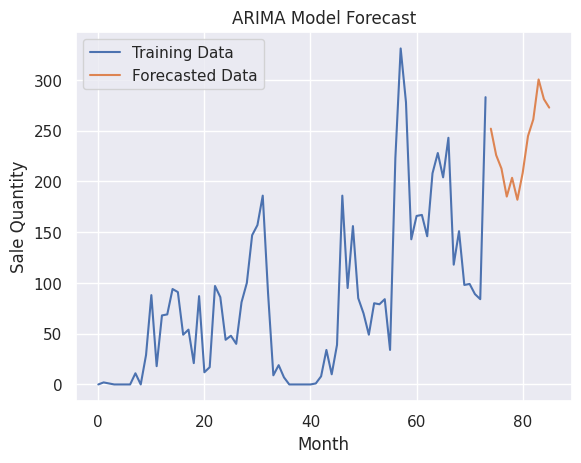

In [65]:
arima_model_pred(ev_sales['BUS'])

## Understanding the EV market and User's opinion on the current products

In [66]:
df_review_2w=review_2w.groupby('Model Name')['rating'].agg(['mean','count','median','std','max','min'])
df_review_2w

,mean,count,median,std,max,min
Model Name,,,,,,
Ampere Magnus EX,3.964286,28,4.0,1.373887,5,1
Ampere Magnus Pro,3.090909,22,3.5,1.874874,5,1
Ampere REO,2.583333,24,2.0,1.717345,5,1
Ampere Zeal,2.846154,13,2.0,1.724633,5,1
Ather 450X,3.666667,30,5.0,1.806756,5,1
BGauss B8,3.000000,4,3.0,1.825742,5,1
Bajaj Chetak,4.133333,15,5.0,1.641718,5,1
Benling Aura,2.863636,22,3.0,1.807272,5,1
Bounce Infinity E1,2.916667,12,2.5,2.020726,5,1


In [67]:
df_review_2w['rank']=df_review_2w['mean'].rank(method="dense")
df_review_2w.sort_values('rank')

,mean,count,median,std,max,min,rank
Model Name,,,,,,,
Joy e-bike Wolf,1.800000,5,1.0,1.788854,5,1,1.0
Hero Electric NYX,2.333333,9,1.0,1.658312,5,1,2.0
Ampere REO,2.583333,24,2.0,1.717345,5,1,3.0
TVS iQube,2.588235,17,2.0,1.660528,5,1,4.0
Okinawa Praise,2.663158,95,2.0,1.819577,5,1,5.0
PURE EV EPluto 7G,2.840000,50,2.0,1.765428,5,1,6.0
Ampere Zeal,2.846154,13,2.0,1.724633,5,1,7.0
Benling Aura,2.863636,22,3.0,1.807272,5,1,8.0
Okinawa Ridge Plus,2.866667,15,3.0,1.457330,5,1,9.0


In [68]:
review_4w.dtypes

Review                   object
Rating                  float64
Attributes Mentioned     object
Model                    object
dtype: object

In [69]:
df_review_4w=review_4w.groupby('Model')['Rating'].agg(['mean','count','median','std','max','min'])
df_review_4w

,mean,count,median,std,max,min
Model,,,,,,
BYD E6,4.500000,10,4.5,0.000000,4.5,4.5
Kia EV6,4.583333,24,4.5,0.408248,5.0,3.5
MG ZS EV,4.500000,24,4.5,0.551677,5.0,3.5
Tata Nexon EV,4.283784,148,4.5,1.078803,5.0,1.0
Tata Tigor EV,4.600000,30,4.5,0.498273,5.0,3.5
hyundai kona,4.250000,44,5.0,1.361856,5.0,1.0


In [70]:
df_review_4w['rank']=df_review_4w['mean'].rank(method="dense")
df_review_4w.sort_values('rank')

,mean,count,median,std,max,min,rank
Model,,,,,,,
hyundai kona,4.250000,44,5.0,1.361856,5.0,1.0,1.0
Tata Nexon EV,4.283784,148,4.5,1.078803,5.0,1.0,2.0
BYD E6,4.500000,10,4.5,0.000000,4.5,4.5,3.0
MG ZS EV,4.500000,24,4.5,0.551677,5.0,3.5,3.0
Kia EV6,4.583333,24,4.5,0.408248,5.0,3.5,4.0
Tata Tigor EV,4.600000,30,4.5,0.498273,5.0,3.5,5.0


# Understand the Purchase Behaviour Dataset

In [71]:
purchase_behaviour.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


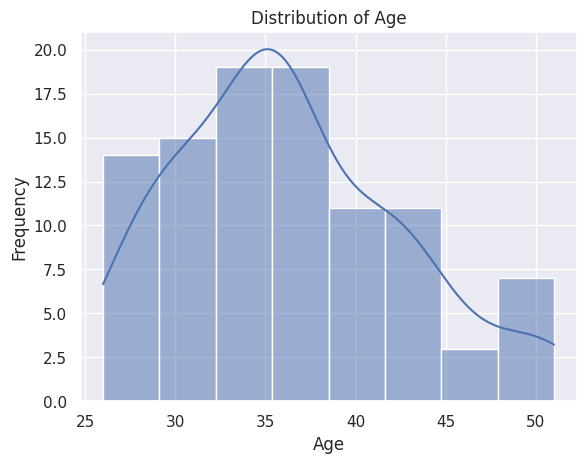

In [72]:
sns.histplot(purchase_behaviour['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

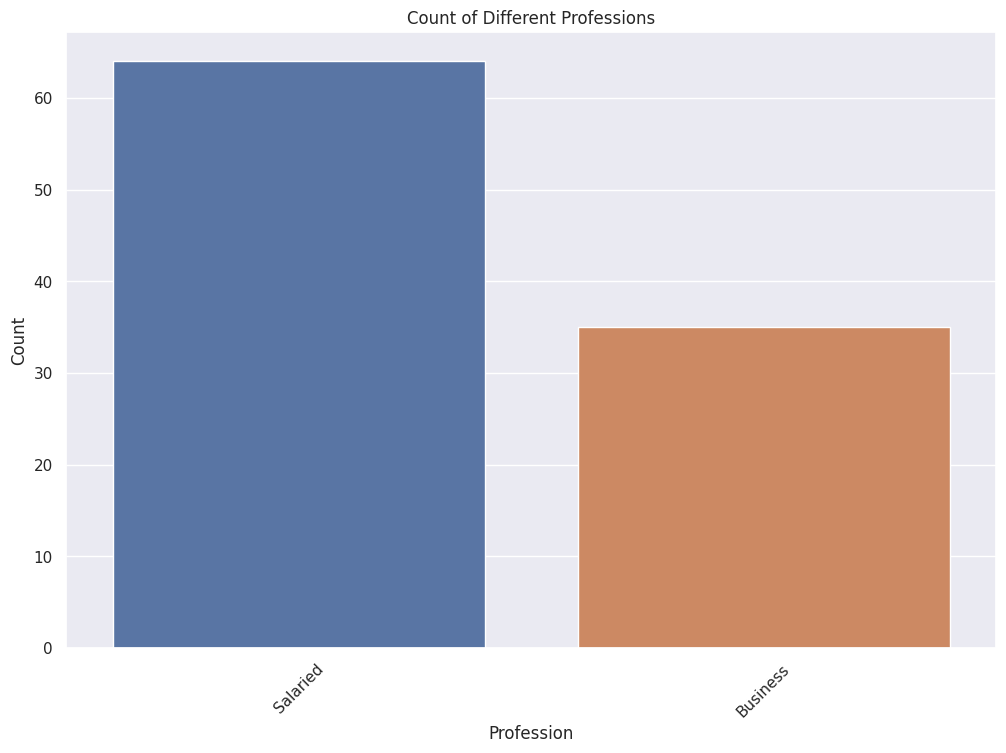

In [73]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Profession', data=purchase_behaviour)
plt.title('Count of Different Professions')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

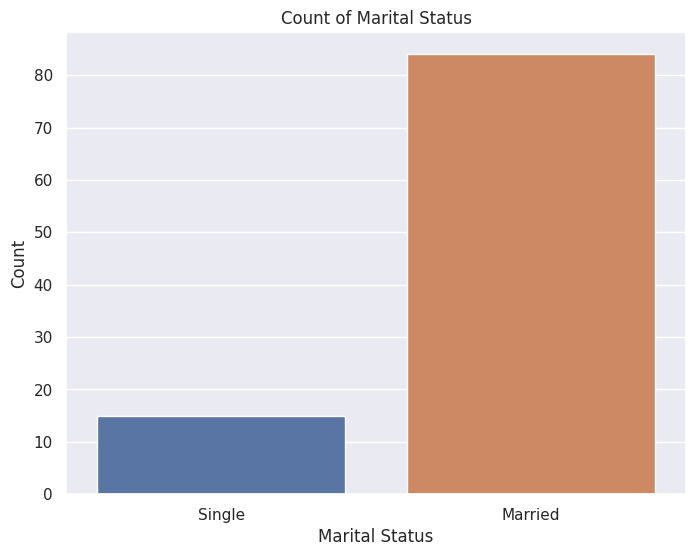

In [74]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Marrital Status', data=purchase_behaviour)
plt.title('Count of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

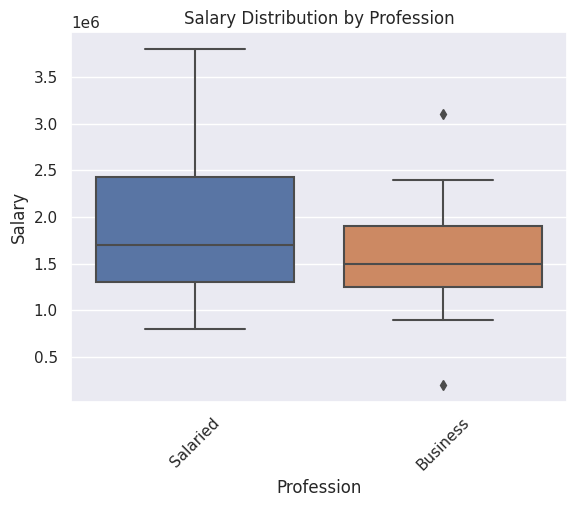

In [75]:
sns.boxplot(x='Profession', y='Salary', data=purchase_behaviour)
plt.title('Salary Distribution by Profession')
plt.xlabel('Profession')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

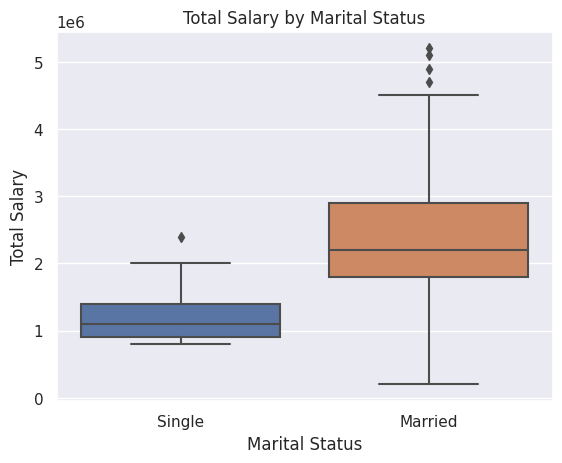

In [76]:
sns.boxplot(x='Marrital Status', y='Total Salary', data=purchase_behaviour)
plt.title('Total Salary by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Salary')
plt.show()

In [77]:
purchase_behaviour.dtypes

Age                  int64
Profession          object
Marrital Status     object
Education           object
No of Dependents     int64
Personal loan       object
House Loan          object
Wife Working        object
Salary               int64
Wife Salary          int64
Total Salary         int64
Make                object
Price                int64
dtype: object

In [78]:
purchase_behaviour['Education'].unique()

array(['Post Graduate', 'Graduate'], dtype=object)

In [79]:
purchase_behaviour['Education']=purchase_behaviour['Education'].map({'Post Graduate':1,'Graduate':0})
purchase_behaviour['No of Dependents']=purchase_behaviour['No of Dependents'].map({'Yes':1,'No':0})
purchase_behaviour['Personal loan']=purchase_behaviour['Personal loan'].map({'Yes':1,'No':0})
purchase_behaviour['House Loan']=purchase_behaviour['House Loan'].map({'Yes':1,'No':0})
purchase_behaviour['Wife Working']=purchase_behaviour['Wife Working'].map({'Yes':1,'No':0})

In [80]:
purchase_behaviour.dropna()
purchase_behaviour.isna().sum()

Age                  0
Profession           0
Marrital Status      0
Education            0
No of Dependents    99
Personal loan        0
House Loan           0
Wife Working         1
Salary               0
Wife Salary          0
Total Salary         0
Make                 0
Price                0
dtype: int64

In [81]:
purchase_behaviour.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,1,NaN,1,0,0.0,800000,0,800000,i20,800000
1,35,Salaried,Married,1,NaN,1,1,1.0,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,0,NaN,1,1,0.0,1800000,0,1800000,Duster,1200000
3,41,Business,Married,1,NaN,0,0,1.0,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,1,NaN,1,0,1.0,1800000,800000,2600000,SUV,1600000


### Performing clustering on the dataset to understand how and in what way is the market grouped

   Age   Salary  Education  Total Salary    Price  Personal loan  House Loan
0   27   800000          1        800000   800000              1           0
1   35  1400000          1       2000000  1000000              1           1
2   45  1800000          0       1800000  1200000              1           1
3   41  1600000          1       2200000  1200000              0           0
4   31  1800000          1       2600000  1600000              1           0


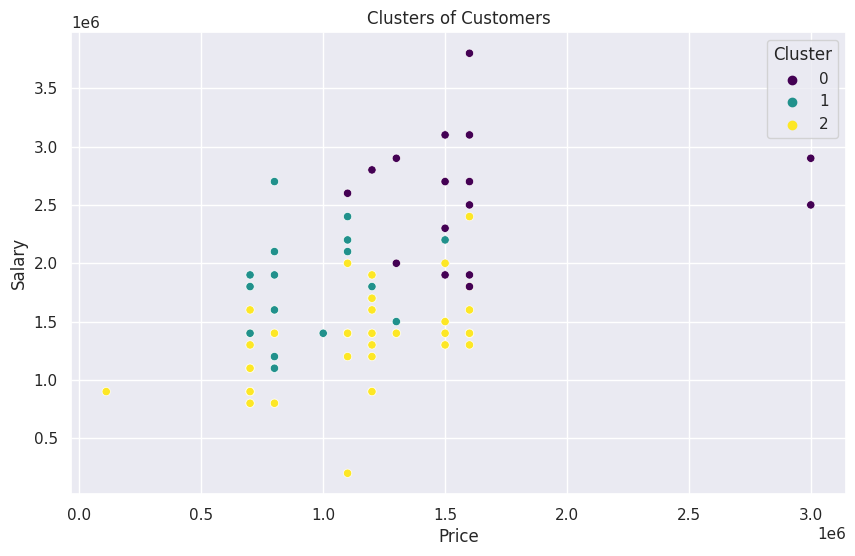

In [82]:
features = purchase_behaviour[['Age', 'Salary','Education','Total Salary', 'Price','Personal loan', 'House Loan']]
print(features.head())
# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=40)
purchase_behaviour['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Salary', hue='Cluster', data=purchase_behaviour, palette='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Price')
plt.ylabel('Salary')
plt.show()

In [83]:
from scipy.spatial import ConvexHull

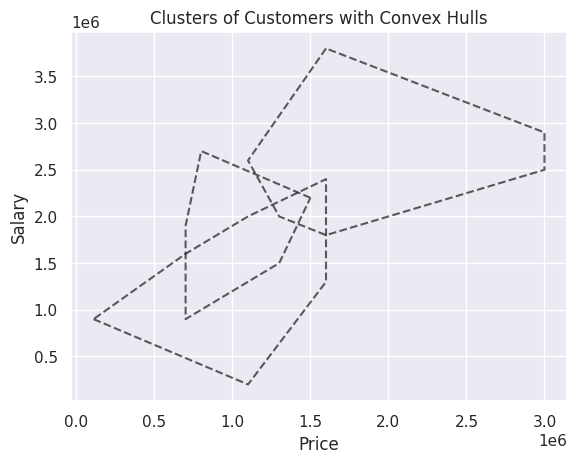

In [84]:
for cluster in np.unique(purchase_behaviour['Cluster']):
    points = purchase_behaviour[purchase_behaviour['Cluster'] == cluster][['Price', 'Salary']].values
    hull = ConvexHull(points)
    hull_points = points[hull.vertices]
    
    # Adding the first point to the end to close the loop
    hull_points = np.concatenate([hull_points, hull_points[0].reshape(1, -1)], axis=0)
    plt.plot(hull_points[:, 0], hull_points[:, 1], 'k--', alpha=0.7)

plt.title('Clusters of Customers with Convex Hulls')
plt.xlabel('Price')
plt.ylabel('Salary')
plt.show()

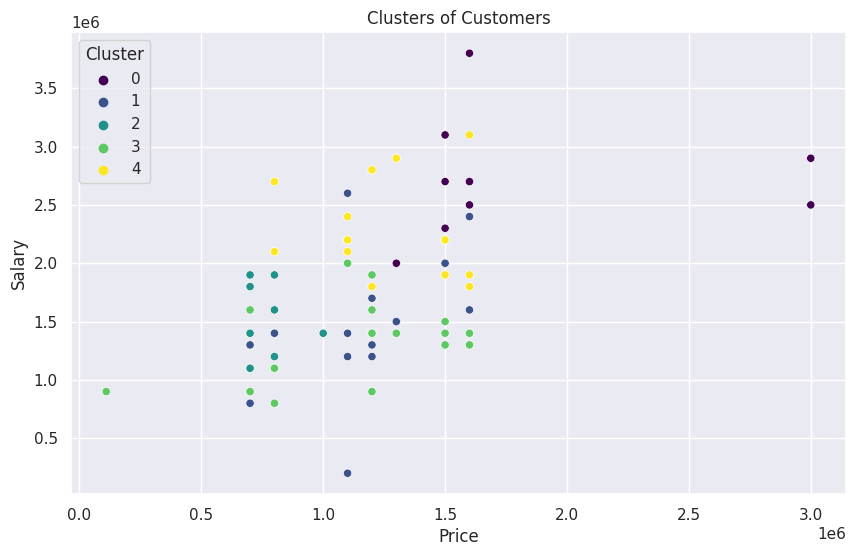

In [85]:
kmeans = KMeans(n_clusters=5, random_state=42)
purchase_behaviour['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Salary', hue='Cluster', data=purchase_behaviour, palette='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Price')
plt.ylabel('Salary')
plt.show()

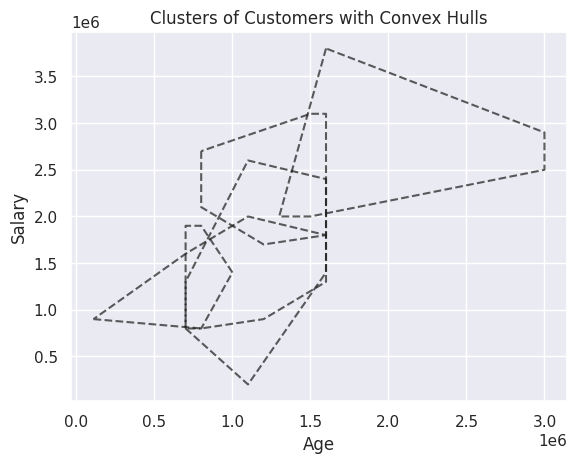

In [86]:
for cluster in np.unique(purchase_behaviour['Cluster']):
    points = purchase_behaviour[purchase_behaviour['Cluster'] == cluster][['Price', 'Salary']].values
    hull = ConvexHull(points)
    hull_points = points[hull.vertices]
    
    # Adding the first point to the end to close the loop
    hull_points = np.concatenate([hull_points, hull_points[0].reshape(1, -1)], axis=0)
    plt.plot(hull_points[:, 0], hull_points[:, 1], 'k--', alpha=0.7)

plt.title('Clusters of Customers with Convex Hulls')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

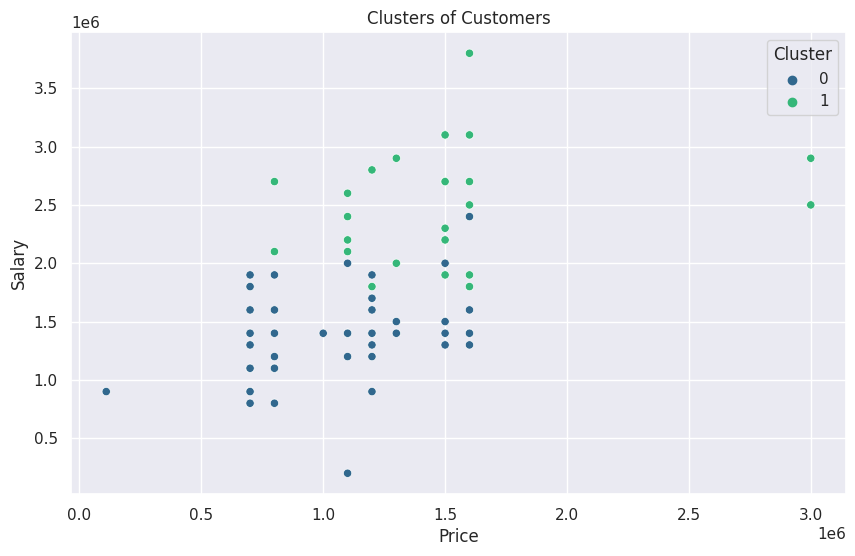

In [87]:
# Applying KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=40)
purchase_behaviour['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Salary', hue='Cluster', data=purchase_behaviour, palette='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Price')
plt.ylabel('Salary')
plt.show()

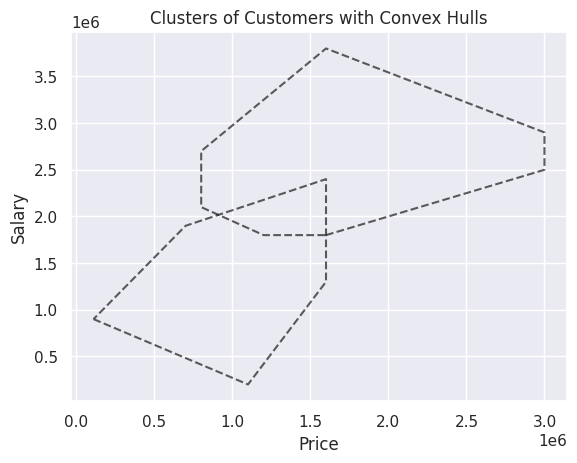

In [88]:
for cluster in np.unique(purchase_behaviour['Cluster']):
    points = purchase_behaviour[purchase_behaviour['Cluster'] == cluster][['Price', 'Salary']].values
    hull = ConvexHull(points)
    hull_points = points[hull.vertices]
    
    # Adding the first point to the end to close the loop
    hull_points = np.concatenate([hull_points, hull_points[0].reshape(1, -1)], axis=0)
    plt.plot(hull_points[:, 0], hull_points[:, 1], 'k--', alpha=0.7)

plt.title('Clusters of Customers with Convex Hulls')
plt.xlabel('Price')
plt.ylabel('Salary')
plt.show()

## The Current EV market place

In [89]:
ev_cars=pd.read_csv("Electric cars.csv")
ev_cars.head()

,Year,BEV average price (USD),Global Sales Volume,Mileage (Km),Lithium Ion Battery Price (USD),Unnamed: 5,Unnamed: 6,Average price of new car
0,2010.0,64032.0,50000,127,1191.0,NaN,NaN,37500.0
1,2011.0,51736.0,60000,139,924.0,NaN,NaN,37311.0
2,2012.0,52084.0,80000,160,726.0,NaN,NaN,36874.0
3,2013.0,56028.0,150000,189,668.0,NaN,NaN,37826.0
4,2014.0,44776.0,224700,210,592.0,NaN,NaN,37519.0


In [90]:
ev_cars[:-3].isna().sum()
ev_cars=ev_cars[:-3]

Text(0.5, 1.0, 'battery price vs average price')

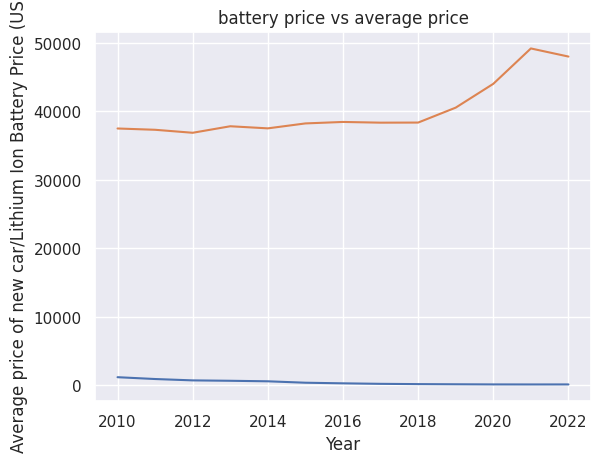

In [91]:
plt.plot(ev_cars['Year'],ev_cars['Lithium Ion Battery Price (USD)'])
plt.plot(ev_cars['Year'],ev_cars['Average price of new car'])
plt.xlabel("Year")
plt.ylabel("Average price of new car/Lithium Ion Battery Price (USD)")
plt.title('battery price vs average price')

In [92]:
ev_cars.tail()

,Year,BEV average price (USD),Global Sales Volume,Mileage (Km),Lithium Ion Battery Price (USD),Unnamed: 5,Unnamed: 6,Average price of new car
8,2018.0,41412.0,1436580,304,181.0,NaN,NaN,38365.0
9,2019.0,42804.0,1708500,336,157.0,NaN,NaN,40546.0
10,2020.0,54600.0,2268000,338,137.0,NaN,NaN,44021.0
11,2021.0,52900.0,4792500,349,132.0,NaN,NaN,49185.0
12,2022.0,67000.0,NaN,400,135.0,NaN,NaN,48000.0


Text(0, 0.5, 'Mileage (Km)')

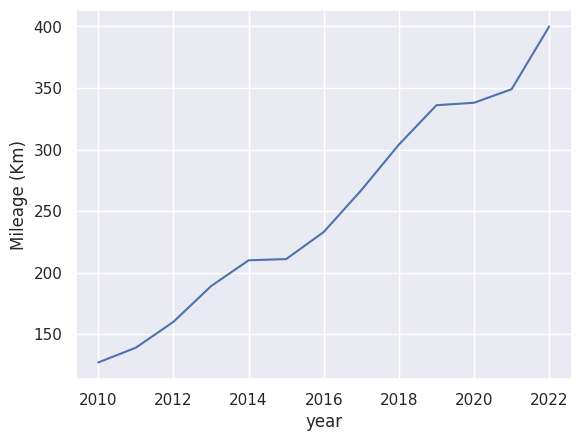

In [93]:
ev_cars['Mileage (Km)']=ev_cars['Mileage (Km)'].astype(float)
plt.plot(ev_cars['Year'],ev_cars['Mileage (Km)'].astype(float))
plt.xlabel("year")
plt.ylabel("Mileage (Km)")

### Using Arima model to undertand the growth and trend of the ev car market place

In [94]:
adf_test = adfuller(ev_cars['Mileage (Km)'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: 3.727153
p-value: 1.000000


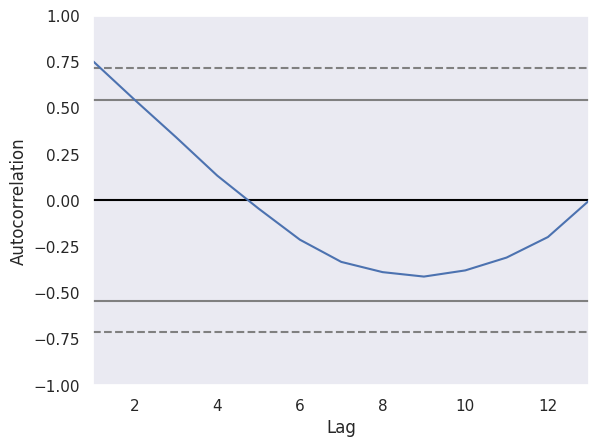

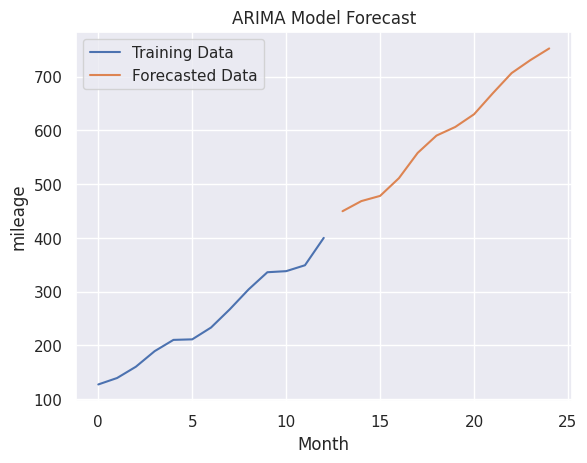

In [95]:
arima_model_pred(ev_cars['Mileage (Km)'],3,ylab='mileage')

In [96]:
adf_test = adfuller(ev_cars['Average price of new car'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: 1.025180
p-value: 0.994525


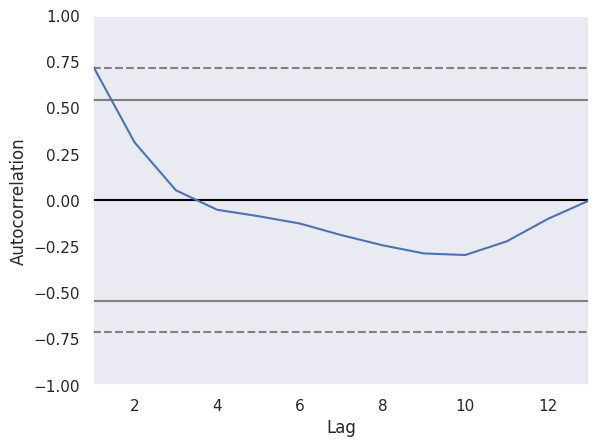

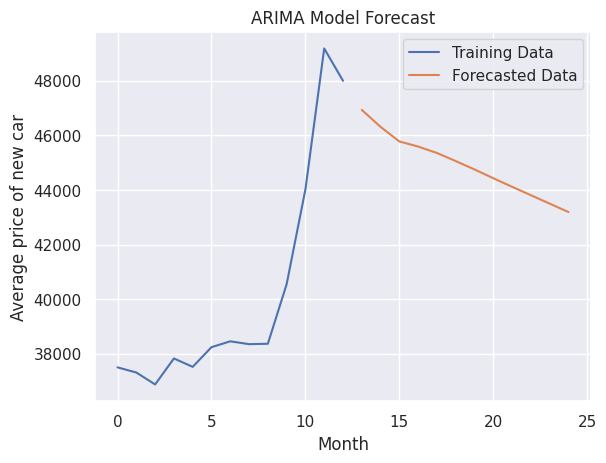

In [97]:
arima_model_pred(ev_cars['Average price of new car'],5,2,ylab='Average price of new car')

## EV charging infrastructure in India

In [98]:
ev_charging_india=pd.read_csv("ev-charging-stations-india.csv")
ev_charging_india.head()

,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0


In [99]:
ev_charging_india['type'].unique()

array([12.,  6.,  7., 13., 14.,  8., 15., 16., 17., 18., 19., nan, 20.,
       21., 11., 10., 24., 22., 23.])

In [100]:
ev_charging_india_grp=ev_charging_india.groupby(['state','city'])['type'].agg(['count'])
ev_charging_india_grp

count
state          city              
Andaman        Port Blair       1
Andhra Pradesh Anantapur        1
               Anantapuram      1
               Bhimavaram       1
               Chittoor         2
...                           ...
WestBengal     ahmedabad        1
               hyderabad        1
               kochi            1
chattisgarh    Bilaspur         1
               Jagdalpur        1

[580 rows x 1 columns]

In [101]:
ev_charging_india_grp['rank']=ev_charging_india_grp['count'].rank(method="dense",ascending=False)
ev_charging_india_grp.sort_values('rank')

count  rank
state       city                   
Delhi       New Delhi      67   1.0
Tamil Nadu  Chennai        48   2.0
Maharashtra Mumbai         41   3.0
Delhi NCR   Delhi          40   4.0
Maharashtra Pune           34   5.0
...                       ...   ...
Kerala      Ernakulam       1  26.0
            Aluva           1  26.0
Karnataka   trivandrum      1  26.0
            raipur          1  26.0
chattisgarh Jagdalpur       1  26.0

[580 rows x 2 columns]

## Understanding Past Car Sales

In [102]:
cars_sales=pd.read_csv("car_prices.csv")
cars_sales.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [103]:
cars_sales_grp=cars_sales.groupby('body')['sellingprice'].agg(['count','mean','median','max'])
cars_sales_grp

,count,mean,median,max
body,,,,
Access Cab,232,13262.500000,13775.0,27000.0
Beetle Convertible,52,18070.192308,18000.0,24000.0
CTS Coupe,129,22758.527132,22200.0,35400.0
CTS Wagon,13,17811.538462,17000.0,26000.0
CTS-V Coupe,28,38425.750000,37300.0,51250.0
...,...,...,...,...
transit van,7,22707.142857,22700.0,25250.0
tsx sport wagon,8,18118.750000,17700.0,22250.0
van,570,15009.742105,18300.0,36000.0


In [104]:
cars_sales_grp['rank']=cars_sales_grp['count'].rank(method="dense",ascending=False)
cars_sales_grp.sort_values('rank')

,count,mean,median,max,rank
body,,,,,
Sedan,199429,11593.969478,11000.0,173000.0,1.0
SUV,119292,15905.503680,15000.0,230000.0,2.0
sedan,41903,12299.985824,11200.0,171500.0,3.0
suv,24552,17138.260590,15700.0,141000.0,4.0
Hatchback,21380,10045.642470,10000.0,67500.0,5.0
...,...,...,...,...,...
CTS-V Wagon,1,50500.000000,50500.0,50500.0,72.0
g37 coupe,1,17300.000000,17300.0,17300.0,72.0
Ram Van,1,1200.000000,1200.0,1200.0,72.0


In [105]:
cars_sales.groupby(['year','body'])['sellingprice'].agg(['count','mean','median','max'])

count          mean   median       max
year body                                               
1990 Convertible      5   1565.000000   1600.0    2500.0
     Hatchback        6   2383.333333   2550.0    3800.0
     Regular Cab      3   8666.666667   8000.0   11500.0
     SUV              2    525.000000    525.0     550.0
     Sedan           25    425.000000    375.0    1100.0
...                 ...           ...      ...       ...
2015 supercab         2  31300.000000  31300.0   31600.0
     suv           1115  29736.502242  24200.0  141000.0
     transit van      7  22707.142857  22700.0   25250.0
     van             18  24683.333333  24050.0   33000.0
     wagon           96  19688.541667  14300.0   45000.0

[794 rows x 4 columns]